In [6]:
import numpy as np

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# ReLU: keeps positives, makes negatives 0
def relu(x):
    return np.maximum(0, x)
# Softmax: gives probabilities for classes
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)
#(needed for backpropagation)
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [8]:
if __name__ == "__main__":
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([0, 0, 0, 1])

    p = Perceptron(input_size=2, activation="sigmoid", lr=0.1)
    p.train(X, y, epochs=5000)

    print("Predictions after training:")
    for x in X:
        print(f"Input: {x}, Output: {p.predict(x)}")


Epoch 0, Error: 0.17100313508555443
Epoch 100, Error: 0.3613044703910956
Epoch 200, Error: 0.247504788605856
Epoch 300, Error: 0.18826629292171515
Epoch 400, Error: 0.15148697800677036
Epoch 500, Error: 0.12644354038319738
Epoch 600, Error: 0.10833102644069093
Epoch 700, Error: 0.09464919005055272
Epoch 800, Error: 0.08396637046698618
Epoch 900, Error: 0.0754043698514959
Epoch 1000, Error: 0.06839528778618154
Epoch 1100, Error: 0.06255607913414762
Epoch 1200, Error: 0.05761929835229673
Epoch 1300, Error: 0.05339273295893876
Epoch 1400, Error: 0.04973480076056713
Epoch 1500, Error: 0.046538980637425675
Epoch 1600, Error: 0.043723638189610226
Epoch 1700, Error: 0.041225189144911245
Epoch 1800, Error: 0.038993392171200014
Epoch 1900, Error: 0.03698803726841915
Epoch 2000, Error: 0.035176570865902757
Epoch 2100, Error: 0.0335323631424701
Epoch 2200, Error: 0.032033424154355616
Epoch 2300, Error: 0.03066143906131813
Epoch 2400, Error: 0.029401033808349575
Epoch 2500, Error: 0.02823920963801

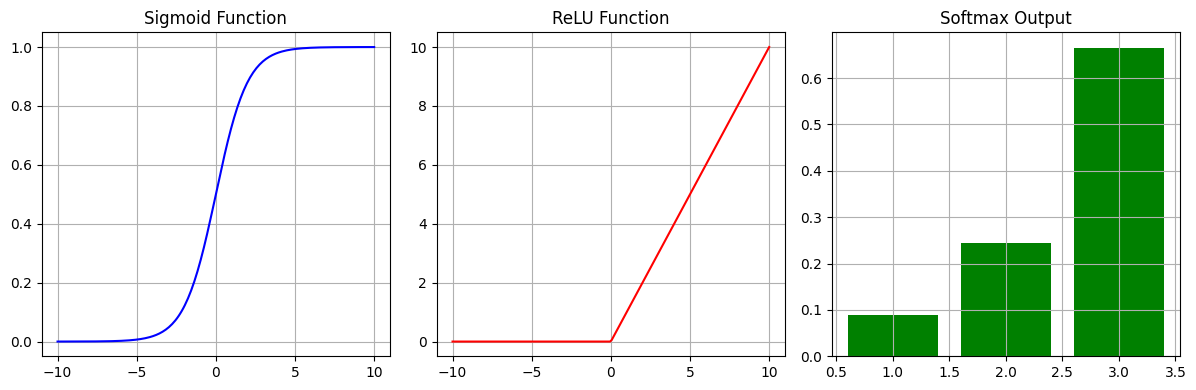

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# X values
x = np.linspace(-10, 10, 200)

# Plot Sigmoid
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(x, sigmoid(x), 'b')
plt.title("Sigmoid Function")
plt.grid(True)

# Plot ReLU
plt.subplot(1,3,2)
plt.plot(x, relu(x), 'r')
plt.title("ReLU Function")
plt.grid(True)

# Plot Softmax (for 3 classes)
plt.subplot(1,3,3)
scores = np.array([[1,2,3]])  # example scores
softmax_output = softmax(scores[0])
plt.bar([1,2,3], softmax_output, color='g')
plt.title("Softmax Output")
plt.grid(True)

plt.tight_layout()
plt.show()


In [11]:
class Perceptron:
    def __init__(self, input_size, activation, lr):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand(1)
        self.activation = activation
        self.lr = lr

    def activate(self, x):
        if self.activation == "sigmoid":
            return sigmoid(x)
        elif self.activation == "relu":
            return relu(x)
        elif self.activation == "softmax":
            return softmax(x)
        else:
            raise ValueError("Unsupported activation function")

    def activate_derivative(self, x):
        if self.activation == "sigmoid":
            return sigmoid_derivative(x)
        elif self.activation == "relu":
            return relu_derivative(x)
        else:
            raise ValueError("Unsupported activation function for derivative")


    def predict(self, x):
        # Ensure x is a numpy array
        x = np.array(x)
        # Compute the weighted sum of inputs and add the bias
        z = np.dot(x, self.weights) + self.bias
        # Apply the activation function
        return self.activate(z)

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            for i in range(len(X)):
                # Get input and target output for the current example
                x = X[i]
                target = y[i]

                # Calculate the predicted output
                predicted_output = self.predict(x)

                # Calculate the error (difference between target and prediction)
                error = target - predicted_output

                # Update weights and bias
                # The update rule for weights is based on the error and input
                self.weights += self.lr * error * x
                # The update rule for the bias is based on the error
                self.bias += self.lr * error

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Error: {np.mean(np.abs(error))}")